In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
from sklearn import datasets

iris = datasets.load_iris()

x = iris.data
y = iris.target

In [28]:
x = x[y < 2, : 2]
y = y[y < 2]

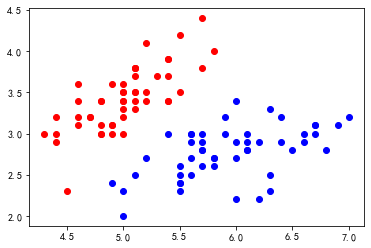

In [31]:
plt.scatter(x[y==0, 0], x[y==0, 1], color='red')
plt.scatter(x[y==1, 0], x[y==1, 1], color='blue')
plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_scaler.fit(x)
x_standard = standard_scaler.transform(x)

In [40]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9)
svc.fit(x_standard, y)

LinearSVC(C=1000000000.0)

In [63]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    print(x0.shape)
    print(x1.shape)
    
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    print(X_new.shape)

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    print(zz.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

(600, 600)
(600, 600)
(360000, 2)
(600, 600)


<ipython-input-63-b34f04b4c5ac>:22: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


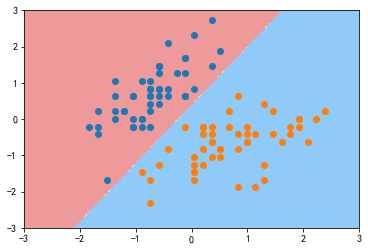

In [64]:
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(x_standard[y==0,0], x_standard[y==0,1])
plt.scatter(x_standard[y==1,0], x_standard[y==1,1])
plt.show()

(600, 600)
(600, 600)
(360000, 2)
(600, 600)


<ipython-input-63-b34f04b4c5ac>:22: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


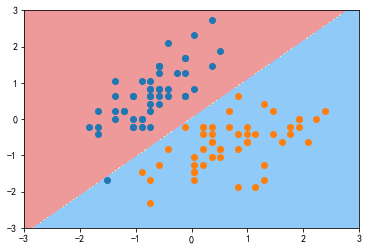

In [66]:
svc2 = LinearSVC(C=0.01)
svc2.fit(x_standard, y)

plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(x_standard[y==0,0], x_standard[y==0,1])
plt.scatter(x_standard[y==1,0], x_standard[y==1,1])
plt.show()

#### 显示间隔平面

In [67]:
def plot_svc_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')

<ipython-input-67-983bb49998dc>:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


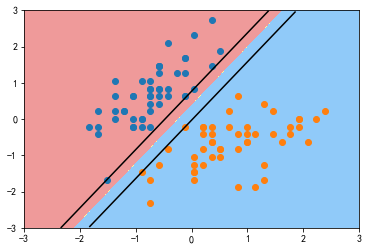

In [71]:
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(x_standard[y==0,0], x_standard[y==0,1])
plt.scatter(x_standard[y==1,0], x_standard[y==1,1])
plt.show()

<ipython-input-67-983bb49998dc>:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


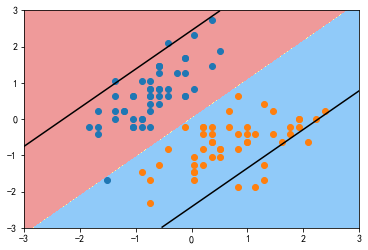

In [72]:
plot_svc_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(x_standard[y==0,0], x_standard[y==0,1])
plt.scatter(x_standard[y==1,0], x_standard[y==1,1])
plt.show()